In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv("USvideos.csv")

In [4]:
df_old = pd.read_csv("USvideos.csv")

In [6]:
df_n = df.fillna({"description":df["title"]})
df = df_n

In [33]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Utah,39.419220,-111.950684,POINT (-111.950684 39.41922)
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Nevada,39.876019,-117.224121,POINT (-117.224121 39.876019)
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Delaware,39.000000,-75.500000,POINT (-75.5 39)
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Michigan,44.182205,-84.506836,POINT (-84.50683600000001 44.182205)


In [7]:


max_ = df["likes"].quantile() * 0.75
min_ = df["likes"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["likes"] > max_ + 1.5 * (max_ - min_), "likes"] = max_q
df.loc[df["likes"] < min_ - 1.5 * (max_ - min_), "likes"] = min_q

max_ = df["category_id"].quantile() * 0.75
min_ = df["category_id"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["category_id"] > max_ + 1.5 * (max_ - min_), "category_id"] = max_q
df.loc[df["category_id"] < min_ - 1.5 * (max_ - min_), "category_id"] = min_q

max_ = df["dislikes"].quantile() * 0.75
min_ = df["dislikes"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["dislikes"] > max_ + 1.5 * (max_ - min_), "dislikes"] = max_q
df.loc[df["dislikes"] < min_ - 1.5 * (max_ - min_), "dislikes"] = min_q

max_ = df["comment_count"].quantile() * 0.75
min_ = df["comment_count"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["comment_count"] > max_ + 1.5 * (max_ - min_), "comment_count"] = max_q
df.loc[df["comment_count"] < min_ - 1.5 * (max_ - min_), "comment_count"] = min_q

max_ = df["views"].quantile() * 0.75
min_ = df["views"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["views"] > max_ + 1.5 * (max_ - min_), "views"] = max_q
df.loc[df["views"] < min_ - 1.5 * (max_ - min_), "views"] = min_q

max_ = df["lon"].quantile() * 0.75
min_ = df["lon"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["lon"] > max_ + 1.5 * (max_ - min_), "lon"] = max_q
df.loc[df["lon"] < min_ - 1.5 * (max_ - min_), "lon"] = min_q

max_ = df["lat"].quantile() * 0.75
min_ = df["lat"].quantile() * 0.25

max_q = max_ + 1.5 * (max_ - min_)
min_q =  min_ - 1.5 * (max_ - min_)

df.loc[df["lat"] > max_ + 1.5 * (max_ - min_), "lat"] = max_q
df.loc[df["lat"] < min_ - 1.5 * (max_ - min_), "lat"] = min_q


C:\Users\Crost\AppData\Local\Temp\ipykernel_7760\3466656681.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27136.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["likes"] > max_ + 1.5 * (max_ - min_), "likes"] = max_q
C:\Users\Crost\AppData\Local\Temp\ipykernel_7760\3466656681.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '946.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["dislikes"] > max_ + 1.5 * (max_ - min_), "dislikes"] = max_q
C:\Users\Crost\AppData\Local\Temp\ipykernel_7760\3466656681.py:43: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1022791.5' has dtype incompatible with int64, please explicitly cast to a compati

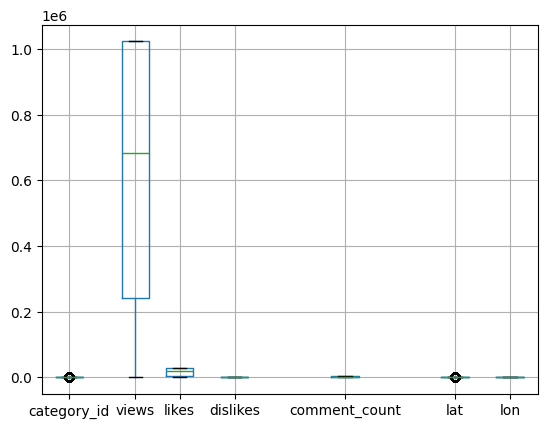

In [202]:
df.boxplot(["category_id","views", "likes", "dislikes", "comment_count", "lat", "lon"], positions=[1, 2.2, 3, 4, 6, 8, 9 ])

plt.subplots_adjust(wspace=10)

<Axes: >

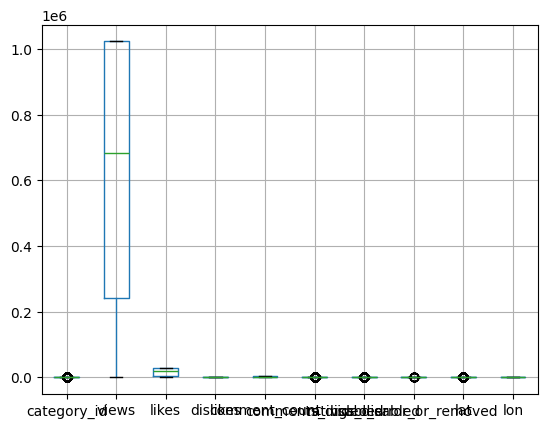

In [8]:
df.boxplot()

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40949 non-null  object 
 1   trending_date           40949 non-null  object 
 2   title                   40949 non-null  object 
 3   channel_title           40949 non-null  object 
 4   category_id             40949 non-null  int64  
 5   publish_time            40949 non-null  object 
 6   tags                    40949 non-null  object 
 7   views                   40949 non-null  float64
 8   likes                   40949 non-null  float64
 9   dislikes                40949 non-null  float64
 10  comment_count           40949 non-null  int64  
 11  thumbnail_link          40949 non-null  object 
 12  comments_disabled       40949 non-null  bool   
 13  ratings_disabled        40949 non-null  bool   
 14  video_error_or_removed  40949 non-null

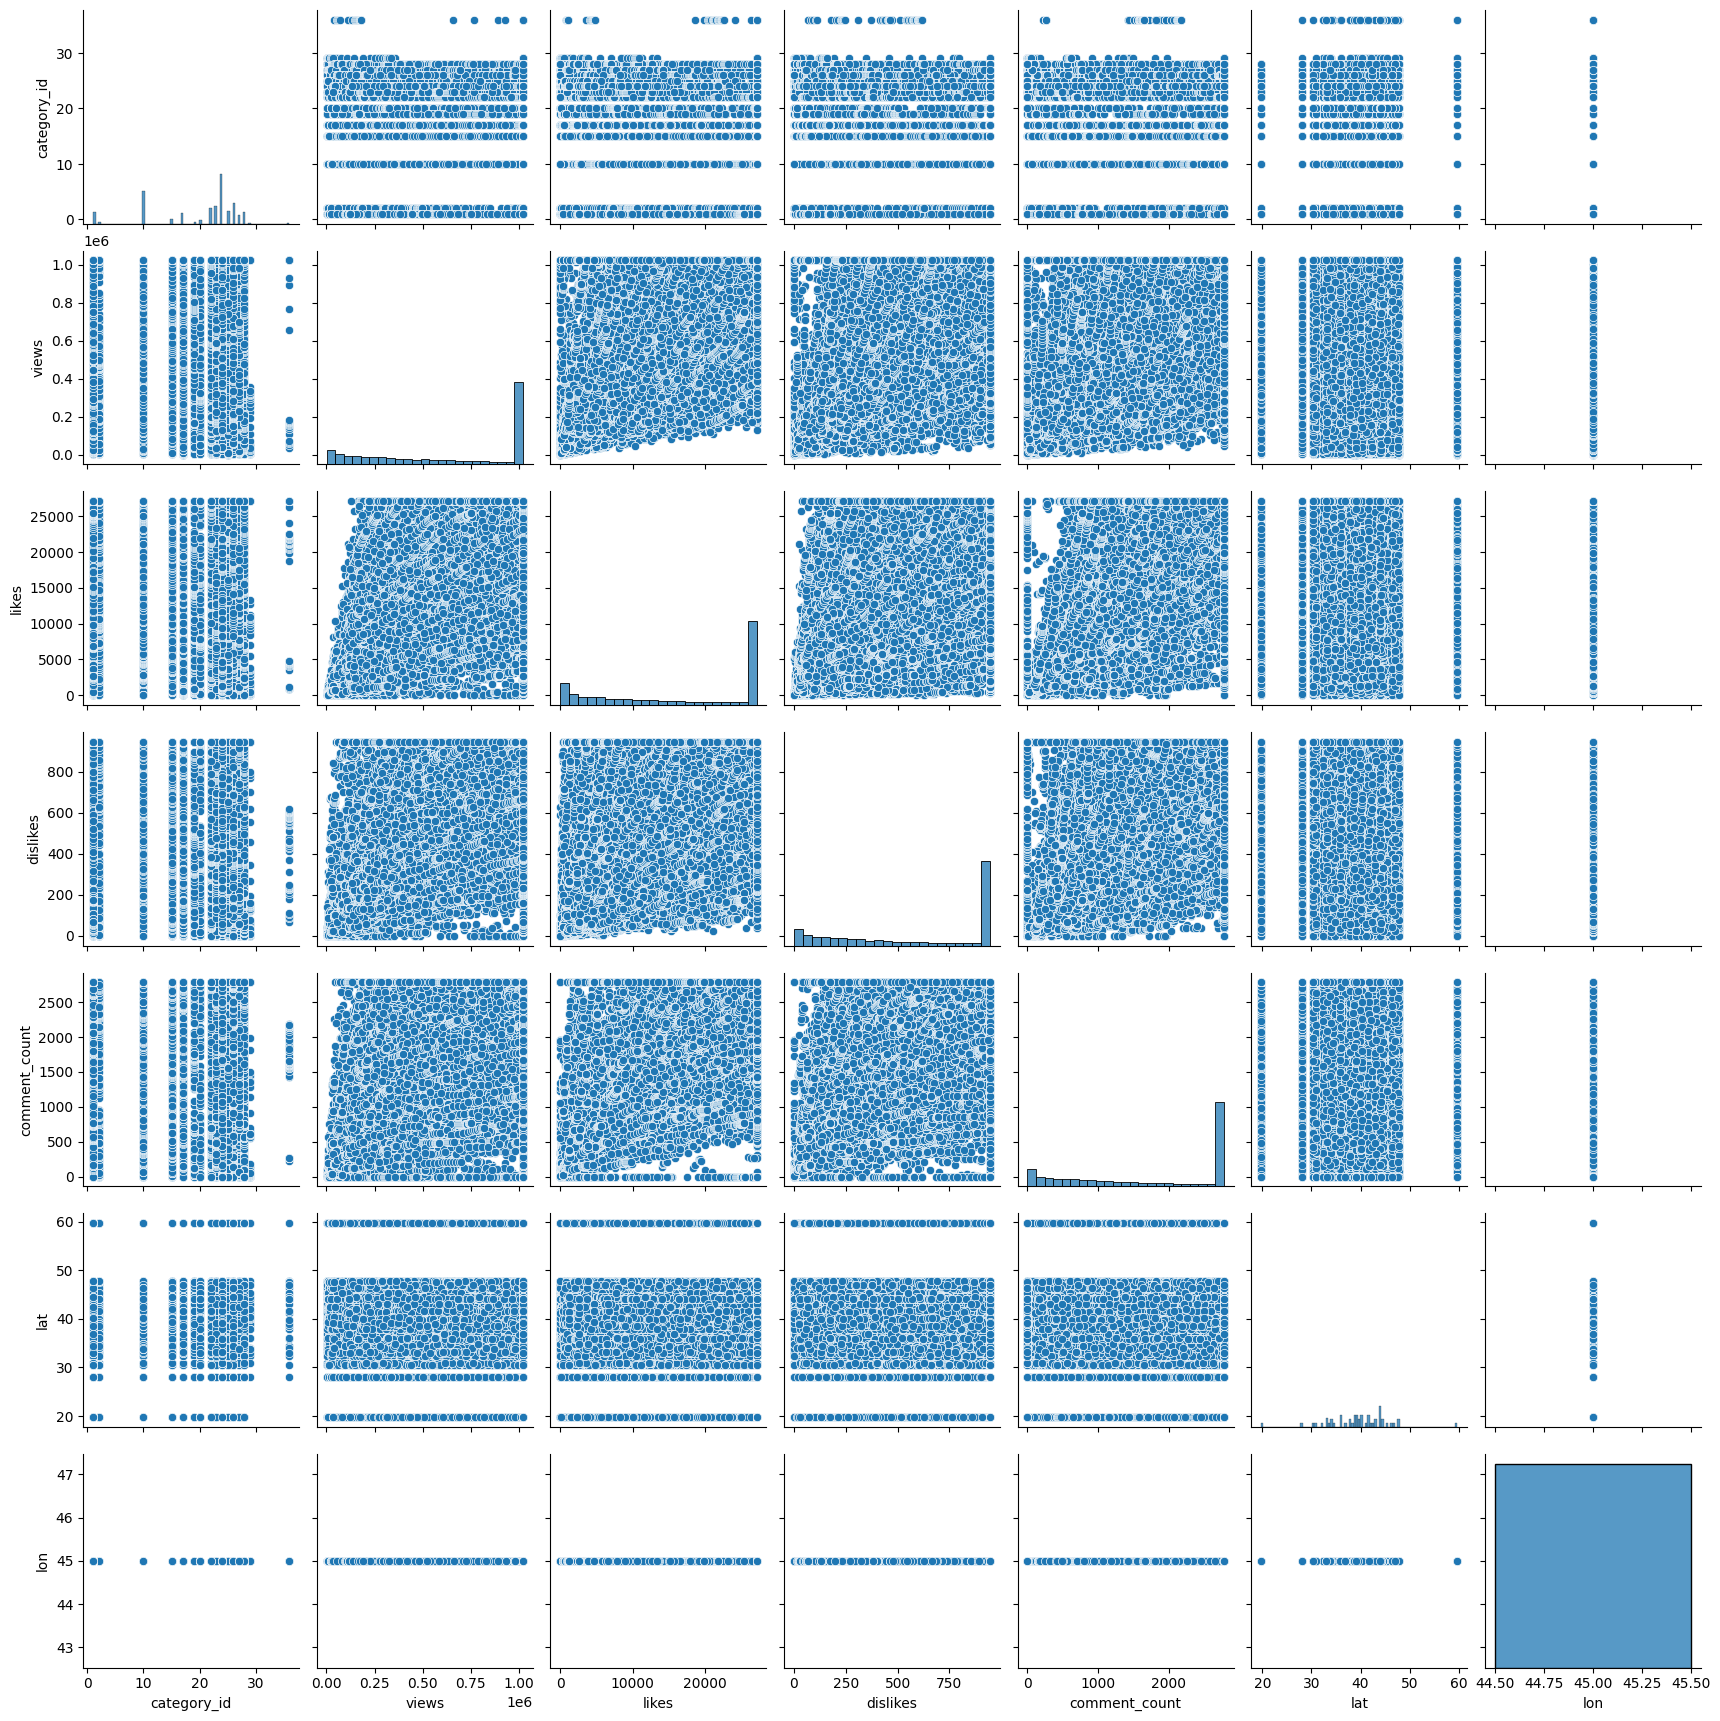

In [9]:
df_ = df[["category_id","views", "likes", "dislikes", "comment_count", "lat", "lon"]]
sns.pairplot(df_)

In [19]:
print(df["views"].corr(df["likes"])) # correlacion fuerte positiva
print(df["comment_count"].corr(df["likes"])) # correlacion fuerte positiva
print(df["dislikes"].corr(df["likes"])) # correlacion fuerte positiva
print(df["lat"].corr(df["likes"])) # no hay correlacion

0.8121757605364103
0.8277934348336276
0.7403153942350117
0.00679799044862487


<Axes: >

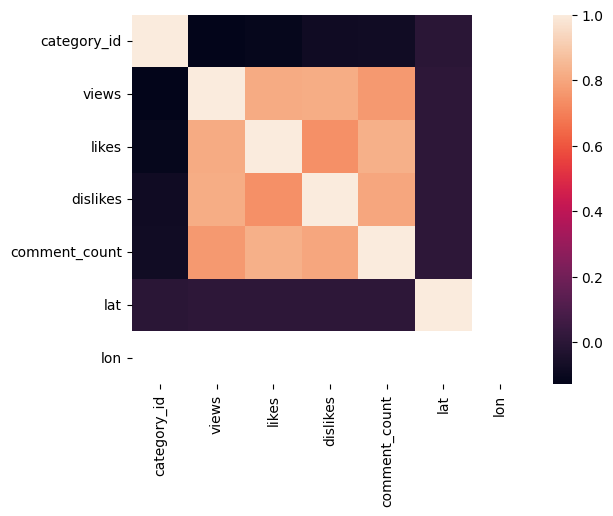

In [10]:
sns.heatmap(df_.corr())

In [11]:
X = df[['views', 'comment_count', 'dislikes']]
y = df['likes']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [14]:
lm = LinearRegression()
lm.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
slope = lm.coef_  # w1
intercept = lm.intercept_ # w0

print("Las pendientes 'w1' del modelo son: ", slope)
print("El término independiente de la recta 'w0' es: ", intercept)

Las pendientes 'w1' del modelo son:  [ 0.01237037  4.95601699 -0.7653106 ]
El término independiente de la recta 'w0' es:  632.1081250338921


In [16]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
views,0.012370
comment_count,4.956017
dislikes,-0.765311


In [18]:
Y_pred = lm.predict(X_test)
Y_pred

array([ 6646.42025121, 25843.87727506, 19206.46094261, ...,
        7014.1691718 , 13124.37071149, 26357.60009909], shape=(16380,))

In [20]:
df_pred = pd.DataFrame(X_test)
df_pred = df_pred.assign(Likes=y_test)
df_pred = df_pred.assign(Pred = Y_pred.flatten().tolist())
df_pred.head(3)

,views,comment_count,dislikes,Likes,Pred
8013,225941.0,762,728.0,3849.0,6646.420251
34432,981263.0,2784,946.5,27136.5,25843.877275
27178,413803.0,2784,447.0,12984.0,19206.460943


In [21]:
df_pred.shape

(16380, 5)

C:\Users\Crost\AppData\Roaming\Python\Python313\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: 'Ventas'

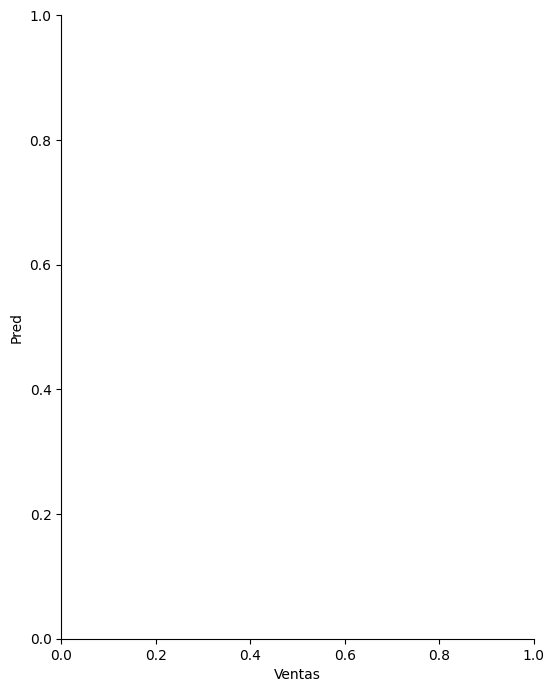

In [ ]:
sns.pairplot(df_pred, x_vars=['Likes'], y_vars='Pred', size=7, aspect=0.8,kind = 'reg')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))